<a href="https://colab.research.google.com/github/hannbi/2025ML-CV/blob/main/ML_HW1_hanbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-NN 분류문제
scikit-learn의 load_breast_canser() 유방암 데이터셋을 활용하여 k=1~10일 때 가장 성능 좋은 k값 구하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN 분류
import matplotlib.pyplot as plt

# 유방암 데이터셋 로딩 및 출력
data=load_breast_cancer()
# print(data) # 데이터 형태 확인
print(data.keys()) # data랑 target값

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
x=data.data
y=data.target

k_values=range(1,11) # 1~10까지의 k분류를 위한 리스트 생성

test_accuracies=[] # 각 k값에 대한 정확도(테스트셋) 수치를 저장하기 위한 리스트
train_accuracies=[] # 이후 학습셋과 테스트셋에 대한 정확도 수치 그래프화를 위해 학습셋 정확도 저장 리스트

# 학습셋/테스트셋 데이터 분할
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42) # k값 비교를 위한 random_state지정)

# 1~10까지 k에 대해 모델 훈련과 정확도 계산
for k in k_values:
  kn=KNeighborsClassifier(n_neighbors=k)
  kn.fit(x_train,y_train) # 모델 훈련

  test_acc=kn.score(x_test,y_test) # 테스트셋 정확도 반환
  train_acc=kn.score(x_train,y_train) # 학습셋 정확도 반환

  test_accuracies.append(test_acc) # 테스트셋 정확도값 test_accuarcies리스트에 차례대로 추가

  train_accuracies.append(train_acc) # 학습셋 정확도 값 train_accuracies리스트에 차례대로 추가

print(test_accuracies)

[0.9300699300699301, 0.9230769230769231, 0.9300699300699301, 0.9440559440559441, 0.965034965034965, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.972027972027972]


In [ ]:
# 가장 성능이 좋은 k값 (테스트셋 정확도 중 가장 높은 값을 갖는 k)
best_k=test_accuracies.index(max(test_accuracies))+1 # append로 0인덱스부터 추가되기 때문에 +1
print("best_k값:",best_k)

best_k값: 10


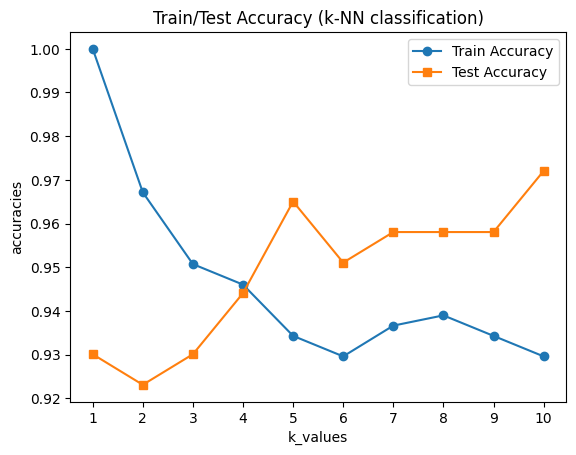

In [ ]:
# 학습셋과 테스트셋에 대한 정확도 수치 그래프화
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o') # 파랑색(기본_1) o
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s') # 주황색(기본_2) square
plt.xlabel('k_values')
plt.ylabel('accuracies')
plt.title('Train/Test Accuracy (k-NN classification)')

plt.xticks(k_values) # k_values값들(1~10)의 정확도 확인을 위한 눈금 표시
plt.legend() # 범례 표시
plt.show()

- k-NN 분류의 k값에 따른 학습, 테스트 정확도를 비교한 결과 k=1에서는 학습셋 정확도가 매우 높지만 테스트 셋에서는 낮은 정확도를 보여 과적합 현상이 나타난다.

- k가 증가함에 따라 학습셋 정확도는 다소 감소하지만 테스트셋 정확도는 증가하는 경향을 보인다.

- 특히 k=5와 k=10에서 테스트셋 정확도가 상대적으로 높아 성능도 높을 것으로 예상된다.

- 둘 중 test accuracy가 더 높은 k=10이 성능이 좋다고 판단한다. 만약  train accuracy와 test accuracy 간의 차이가 k=5일 떄 보다 더 커서 과적합이 우려된다면 k=5가 성능이 좋다고 판단할 것이다.